# Intelligent Crop Recommendation System

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks_ML/Project/Crop_recommendation_null.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,83.0,40.0,44.0,21.525540,80.212360,5.956130,NaN,rice
3,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
4,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice


In [ ]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2215,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507,coffee
2216,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,coffee
2217,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839,coffee
2218,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293,coffee
2219,104.0,18.0,30.0,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
data.shape

(2220, 8)

In [ ]:
data.size

17760

In [ ]:
data.dtypes

N              float64
P              float64
K              float64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
data.rename(columns={"N":"Nitrogen","P":"Phosphorous","K":"Potassium","label":"Crop"},inplace=True)
data.head()

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall,Crop
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,83.0,40.0,44.0,21.525540,80.212360,5.956130,NaN,rice
3,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
4,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice


In [ ]:
data.describe()

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall
count,2216.000000,2215.000000,2219.000000,2217.000000,2218.000000,2218.000000,2217.000000
mean,50.488267,53.296163,48.092384,25.607468,71.452329,6.470305,103.306011
std,36.869116,32.925813,50.581381,5.078371,22.286509,0.772505,54.955422
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.750888,60.270822,5.971933,64.328871
50%,37.000000,51.000000,32.000000,25.567483,80.464995,6.426829,94.761894
75%,84.000000,68.000000,49.000000,28.562122,89.936402,6.924379,123.649515
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
data['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
data['Crop'].nunique()

22

In [ ]:
data['Crop'].value_counts()

rice           102
muskmelon      102
kidneybeans    102
mungbean       102
pomegranate    102
lentil         102
maize          102
chickpea       101
orange         101
blackgram      101
grapes         101
papaya         101
pigeonpeas     101
mango          100
banana         100
jute           100
mothbeans      100
coconut        100
coffee         100
apple          100
cotton         100
watermelon     100
Name: Crop, dtype: int64

In [ ]:
data.isnull().sum()

Nitrogen       4
Phosphorous    5
Potassium      1
temperature    3
humidity       2
ph             2
rainfall       3
Crop           0
dtype: int64

In [ ]:
data.dropna(inplace=True)
data.head()

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall,Crop
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
3,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
4,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
5,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data.isnull().sum()

Nitrogen       0
Phosphorous    0
Potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
Crop           0
dtype: int64

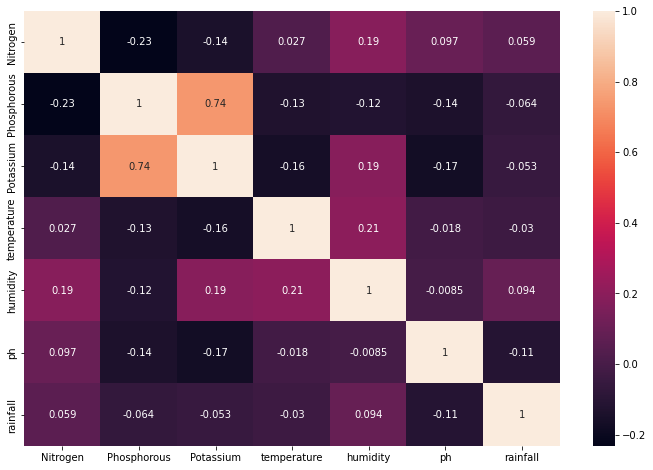

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True);

In [ ]:
colors=['tomato', 'gold', 'forestgreen', 'royalblue', 'cyan', 'orange', 'pink', 'brown', 'purple', 'hotpink', 
        'teal', 'lightcoral', 'gray', 'khaki', 'violet', 'springgreen', 'indianred', 'lavender', 'yellowgreen', 
        'lightseagreen', 'lightpink', 'plum']

Text(0.5, 1.0, 'Crops vs Minimum Rainfall Required')

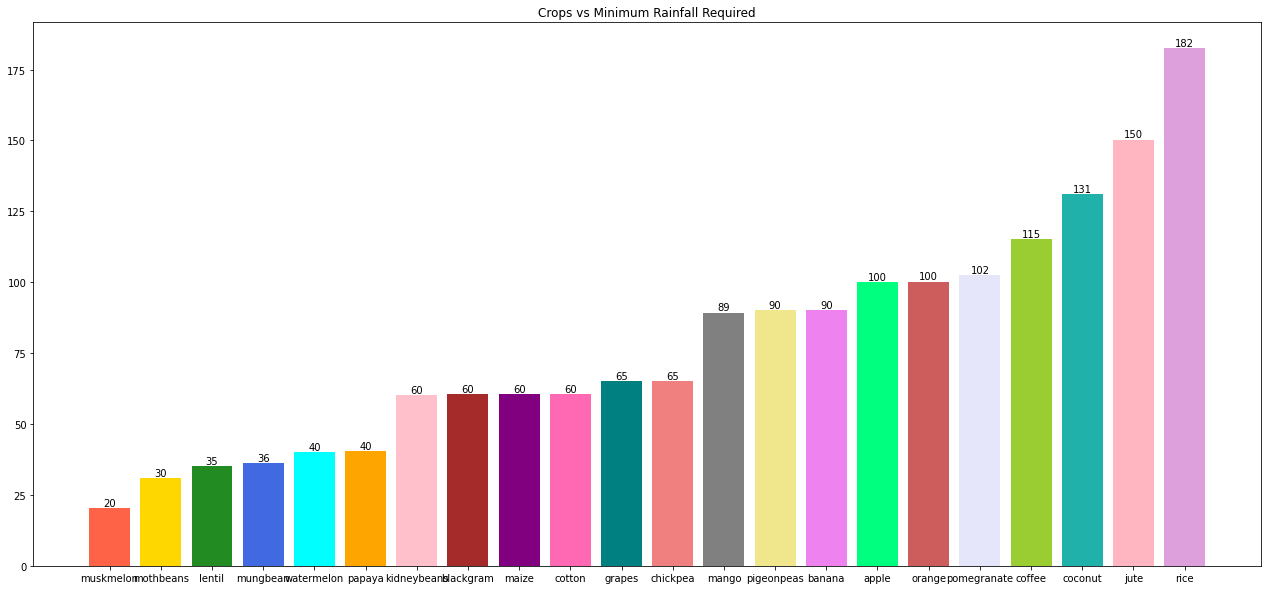

In [ ]:
crop = data.groupby(by='Crop')['rainfall'].min().reset_index().sort_values(by='rainfall')
crop 
fig, ax = plt.subplots(figsize=(22,10))
plt.tick_params(labelsize=10)
plt.bar(crop.Crop, crop.rainfall, color=colors)
for x,y in zip(crop.Crop, crop.rainfall):
    plt.text(x, y+0.1, '%d' % y, ha='center', va='bottom')
plt.title('Crops vs Minimum Rainfall Required')

Text(0.5, 1.0, 'Crops vs Maximum Temperature')

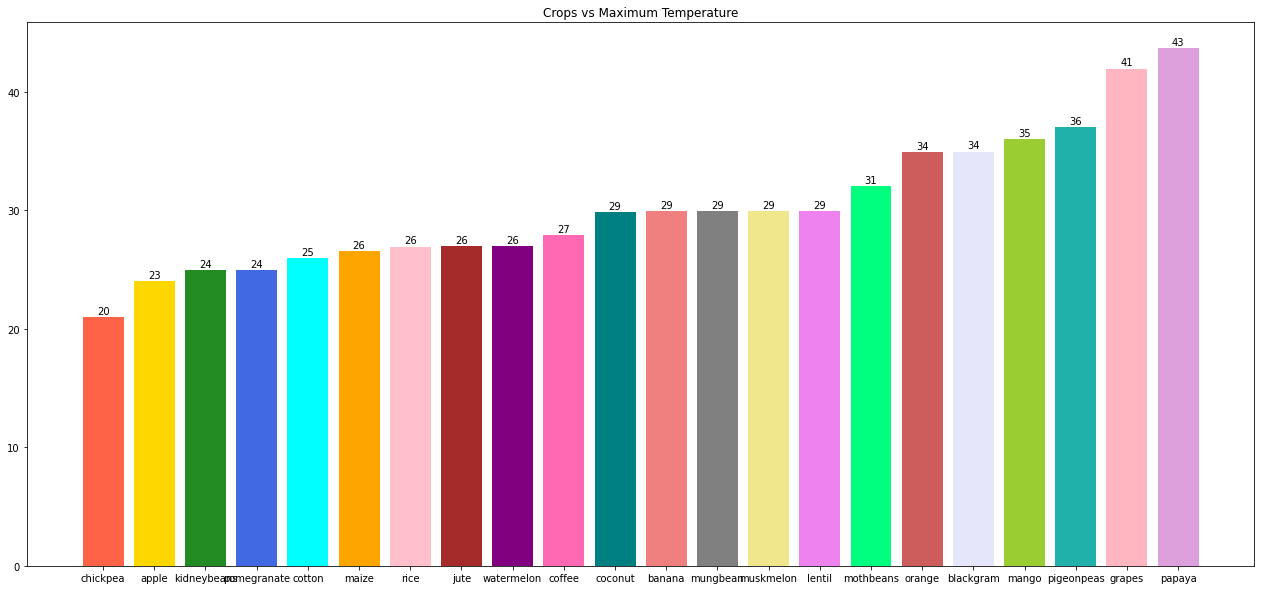

In [ ]:
crop = data.groupby(by='Crop')['temperature'].max().reset_index().sort_values(by='temperature')
crop 
fig, ax = plt.subplots(figsize=(22,10))
plt.tick_params(labelsize=10)
plt.bar(crop.Crop, crop.temperature, color=colors)
for x,y in zip(crop.Crop, crop.temperature):
    plt.text(x, y+0.1, '%d' % y, ha='center', va= 'bottom')
plt.title('Crops vs Maximum Temperature')

**Checking outliers based on specific Crop using IQR**

In [ ]:
cotton_data = data.loc[data['Crop']=='cotton']
cotton_data.head()

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall,Crop
1920,133.0,47.0,24.0,24.402289,79.197320,7.231325,90.802236,cotton
1921,136.0,36.0,20.0,23.095956,84.862757,6.925412,71.295811,cotton
1922,104.0,47.0,18.0,23.965635,76.976967,7.633437,90.756167,cotton
1923,133.0,47.0,23.0,24.887381,75.621372,6.827355,89.760504,cotton
1924,126.0,38.0,23.0,25.362438,83.632761,6.176716,88.436189,cotton


In [ ]:
cotton_data.shape

(100, 8)

In [ ]:
q1=np.percentile(cotton_data['temperature'],25)
q1

23.01761537

In [ ]:
q3=np.percentile(cotton_data['temperature'],75)
q3

24.97373546

In [ ]:
iqr=q3-q1
iqr

1.9561200899999989

In [ ]:
cut_off = 1.5*iqr
cut_off

2.9341801349999983

In [ ]:
lower, upper = q1 - cut_off, q3 + cut_off
print(lower)
print(upper)

20.083435235000003
27.907915595


In [ ]:
outliers = [x for x in cotton_data['temperature'] if (x<lower) or (x>upper)]
outliers

[]

**Checking outliers based on specific Crop using Standard Deviation**

In [ ]:
cotton_data = data.loc[data['Crop']=='cotton']
cotton_data.head()

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall,Crop
1920,133.0,47.0,24.0,24.402289,79.197320,7.231325,90.802236,cotton
1921,136.0,36.0,20.0,23.095956,84.862757,6.925412,71.295811,cotton
1922,104.0,47.0,18.0,23.965635,76.976967,7.633437,90.756167,cotton
1923,133.0,47.0,23.0,24.887381,75.621372,6.827355,89.760504,cotton
1924,126.0,38.0,23.0,25.362438,83.632761,6.176716,88.436189,cotton


In [ ]:
cotton_data.shape

(100, 8)

In [ ]:
mean = cotton_data['temperature'].mean()
mean

23.988957895200016

In [ ]:
std = cotton_data['temperature'].std()
std

1.135681479912332

In [ ]:
cut_off = std*3
cut_off

3.407044439736996

In [ ]:
lower, upper = mean - cut_off, mean + cut_off
print(lower)
print(upper)

20.58191345546302
27.396002334937013


In [ ]:
outliers = [x for x in cotton_data['temperature'] if (x<lower) or (x>upper)]
outliers

[]

**Training and Testing**

In [ ]:
independent = data[['Nitrogen', 'Phosphorous','Potassium','temperature', 'humidity', 'ph', 'rainfall']]
independent.head()

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537
3,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248
4,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034
5,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340


In [ ]:
dependent = data[['Crop']]
dependent.head()

,Crop
0,rice
1,rice
3,rice
4,rice
5,rice


In [ ]:
model = []        # Model names
accuracy = []     # Accuracy of the respective model

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(independent, dependent, test_size = 0.2, random_state =2)

print("Length of X_train is %s" % (len(Xtrain)))
print("Length of X_test is %s" % (len(Xtest)))
print("Length of Y_train is %s" % (len(Ytrain)))
print("Length of Y_test is %s" % (len(Ytest)))

Length of X_train is 1760
Length of X_test is 440
Length of Y_train is 1760
Length of Y_test is 440


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

LogReg = LogisticRegression(random_state=2)
LogReg.fit(Xtrain,Ytrain)
predicted_values = LogReg.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
model.append('Logistic Regression')
accuracy.append(x*100)
print(classification_report(Ytest, predicted_values))
print("Logistic Regression's Accuracy is: ", x*100)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

In [ ]:
score_LR = cross_val_score(LogReg, independent, dependent, cv=5)
score_LR

array([0.95      , 0.96590909, 0.94772727, 0.96818182, 0.94318182])

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)
DecisionTree.fit(Xtrain, Ytrain)
predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
model.append('Decision Tree')
accuracy.append(x*100)
print(classification_report(Ytest, predicted_values))
print("Decision Trees' Accuracy is: ", x*100)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

In [ ]:
score_DT = cross_val_score(DecisionTree, independent, dependent, cv=5)
score_DT

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)
predicted_values = RF.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x*100)
model.append('Random Forest')
print(classification_report(Ytest,predicted_values))
print("RF's Accuracy is: ", x*100)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

In [ ]:
score_RF = cross_val_score(RF,independent,dependent,cv=5)
score_RF

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

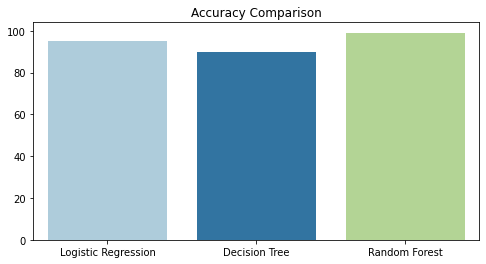

In [ ]:
plt.figure(figsize=(8,4))
plt.title('Accuracy Comparison')
sns.barplot(x=model, y=accuracy, palette='Paired')

**Predicting Results**

Example **1**

In [ ]:
test_data = np.array([[80, 20, 30, 21.364, 55.127, 6.3, 120.21]])
prediction = LogReg.predict(test_data)
print(prediction)

['coffee']


In [ ]:
test_data = np.array([[80, 20, 30, 21.364, 55.127, 6.3, 120.21]])
prediction = DecisionTree.predict(test_data)
print(prediction)

['coffee']


In [ ]:
test_data = np.array([[80, 20, 30, 21.364, 55.127, 6.3, 120.21]])
prediction = RF.predict(test_data)
print(prediction)

['coffee']


Example **2**

In [ ]:
test_data = np.array([[93, 41, 40, 20.87, 82.032, 6.5, 205.9]])
prediction = LogReg.predict(test_data)
print(prediction)

['rice']


In [ ]:
test_data = np.array([[93, 41, 40, 20.87, 82.032, 6.5, 205.9]])
prediction = DecisionTree.predict(test_data)
print(prediction)

['rice']


In [ ]:
test_data = np.array([[93, 41, 40, 20.87, 82.032, 6.5, 205.9]])
prediction = RF.predict(test_data)
print(prediction)

['rice']
